In [1]:
###data processing assoicated package
import pickle
import pprint
import gc 
import datetime
import numpy as np
###drawing package
import os
os.environ['PROJ_LIB'] = 'C:\\Users\\jerry\\anaconda3\\Library\\share\\'
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import glob
import netCDF4 as nc
import pickle
import csv
import cv2
import math
import numpy.ma as ma
from skimage import filters


In [ ]:
#label_202102=[0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1]
#label_202103=[0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
###2/3     5    9     15    19  22   24   28
###3/5     8    13  14   25

In [2]:
print('ext shape')
x = np.arange(85.0025,205.0025,0.005)
y = np.arange(-59.9975,60.0025,0.005)
#print(x.shape)
#print(y.shape)
#local_lon=x[6500:10700]
#local_lat=y[15900:20100]
local_lon=x[6700:8700]
local_lat=y[16200:17200]

ext shape


In [3]:
local_lon=x[6700:8700]
local_lat=y[16200:17200]

In [75]:
with open('fogedge_rgb_202002080000.pkl', 'rb') as f:
          band_data=pickle.load(f)
with open('predict/fogedge_rgb_201701070000.pkl', 'rb') as f:
          predict_label=pickle.load(f)

In [76]:
aa=band_data
mesh=aa[:,:-1,:]
color_t=mesh.reshape((mesh.shape[0] * mesh.shape[1]),3)
#print(np.min(band011))
#print(band022[band022<0])
#print(np.min(band033))
color_t[color_t>1] = 1

In [63]:
thesh=filters.threshold_otsu(predict_label)
print(thesh)

0.0006887162


In [35]:
print(band_data.shape)

(1000, 1000, 3)


In [36]:
xxx=local_lon[0:1000]
yyy=local_lat

In [37]:
print(xxx.shape)

(1000,)


In [38]:
test= cv2.resize(xxx, (1,512), interpolation=cv2.INTER_LINEAR)


In [39]:
print(xxx[0:10])

[118.5025 118.5075 118.5125 118.5175 118.5225 118.5275 118.5325 118.5375
 118.5425 118.5475]


In [40]:
print(test.shape)

(512, 1)


In [42]:
with open('region_mask.pkl', 'rb') as f:
    region_mask=pickle.load(f)

In [43]:
with open('topo_regrid_500m.pkl', 'rb') as f:
    topo1 = pickle.load(f)

In [45]:
#fogedge_label_202002080000
with open('fogedge_label_202002080000.pkl', 'rb') as f:
    label = pickle.load(f)

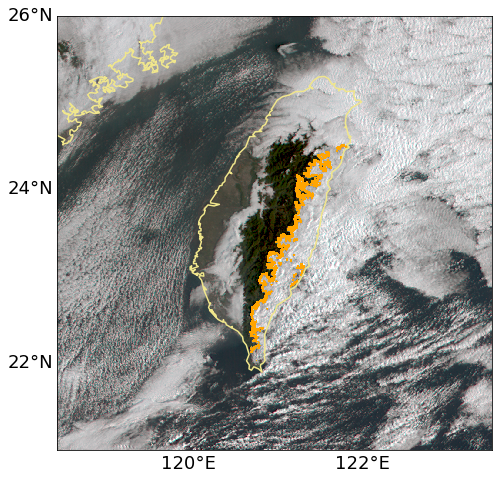

In [77]:
fig = plt.figure(figsize=(8,8))
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='khaki')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
m.pcolormesh(xxx,yyy,band_data[:,:,2],color=color_t)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("orange")
#test=ma.masked_where(edge<thesh,edge)
ttest=ma.masked_where(label<0.00001,label)
#test=edge
m.pcolormesh(xxx,yyy,ttest,cmap=cmap2,vmin=0,vmax=0.01)

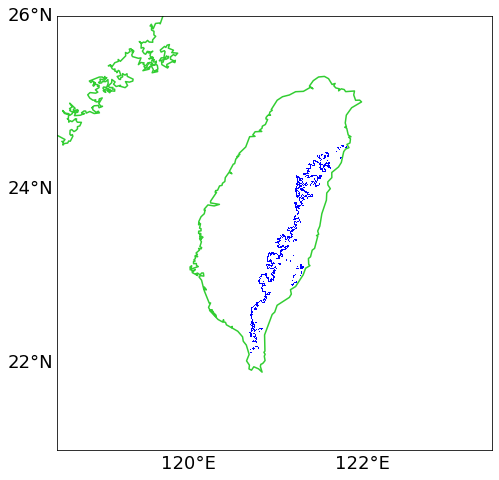

In [46]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("b")
#test=ma.masked_where(edge<thesh,edge)
#ttest=ma.masked_where(topo1<500,edge)
#test=edge
m.pcolormesh(xxx,yyy,label,cmap=cmap2,vmin=0.5,vmax=0.7)

In [125]:
label_201902=[1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0]
print(len(label_201902))

28


In [54]:
print(region_mask.shape)

(1000, 801)


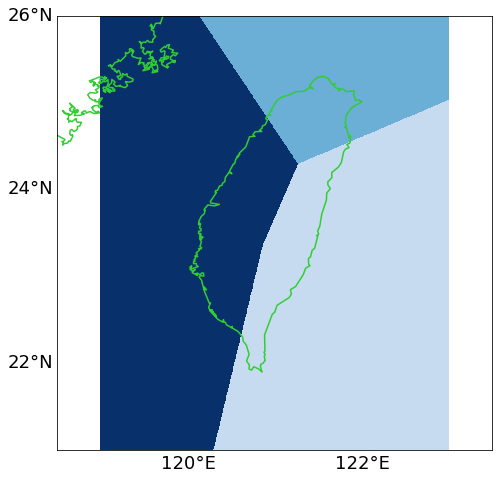

In [56]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("b")
#test=ma.masked_where(edge<thesh,edge)

#test=edge
m.pcolormesh(t_lon,t_lat,region_mask,cmap=cmap2,vmin=0,vmax=35)

In [57]:
ttest[region_mask>11]=0

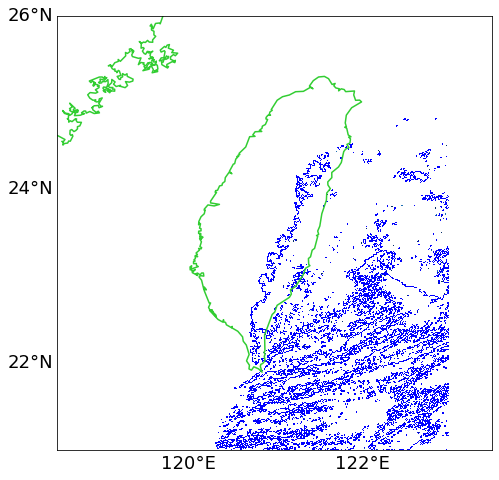

In [59]:
fig = plt.figure(figsize=(8,8)) 
m = Basemap(llcrnrlon=118.5, urcrnrlon=123.5, llcrnrlat=21, urcrnrlat=26,resolution='i')
m.drawcoastlines(linewidth=1.5,color='limegreen')
m.drawparallels(np.arange(22., 27., 2.), labels=[1, 0, 0, 0], linewidth=0, color='k', fontsize=18)
m.drawmeridians(np.arange(118., 123., 2.), labels=[0, 0, 0, 1], linewidth=0, color='k', fontsize=18)
cmap2 = cm.get_cmap("Blues",lut=5)
cmap2.set_under("w")
cmap2.set_over("b")
#test=ma.masked_where(edge<thesh,edge)
edge[region_mask>11]=0
ttest=ma.masked_where(topo1<500,edge)
#test=edge
m.pcolormesh(t_lon,t_lat,edge,cmap=cmap2,vmin=24,vmax=25)